In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans


In [ ]:
df=pd.read_csv("./Mall_Customers.csv")


In [12]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate analysis

In [ ]:
df.describe()

In [ ]:
sns.displot(df["Annual Income (k$)"])

In [15]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

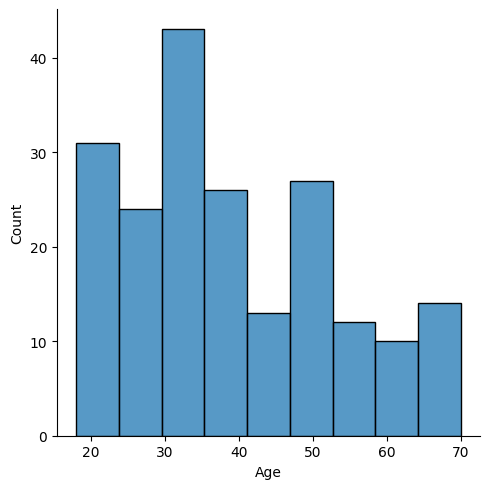

<Figure size 640x480 with 0 Axes>

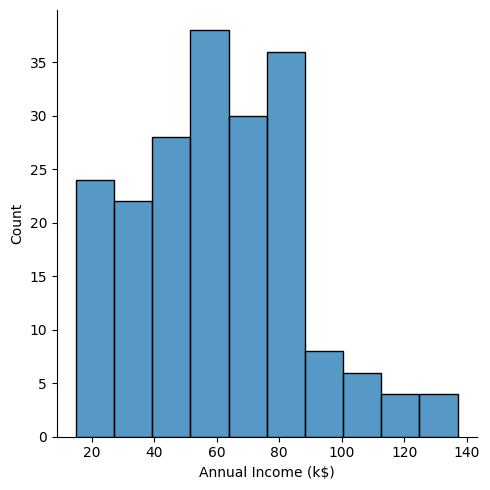

<Figure size 640x480 with 0 Axes>

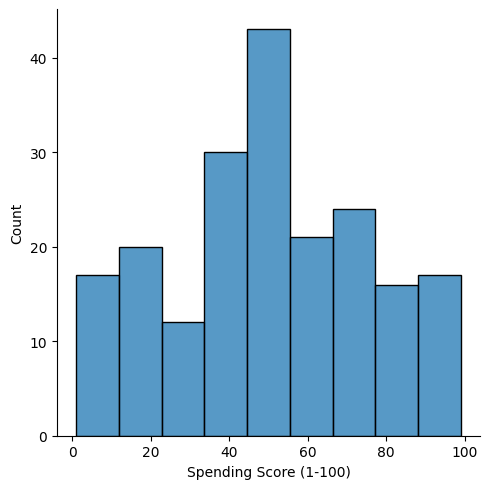

In [7]:
columns=['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in columns: 
   plt.figure()
   sns.displot(df[i])
    

<Figure size 640x480 with 0 Axes>

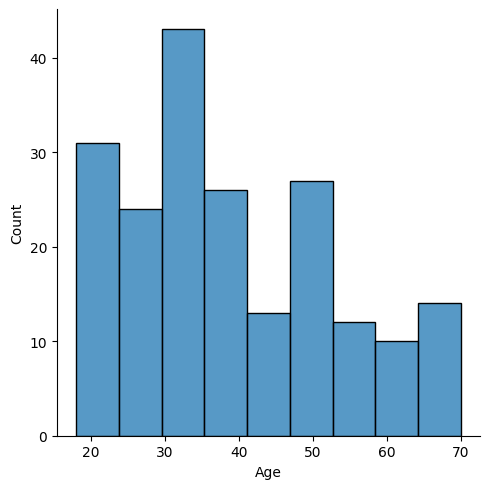

<Figure size 640x480 with 0 Axes>

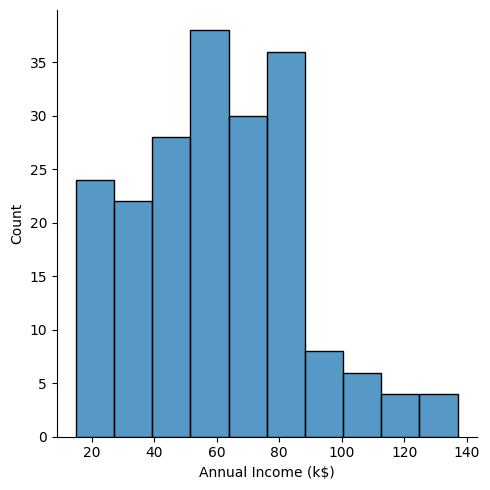

<Figure size 640x480 with 0 Axes>

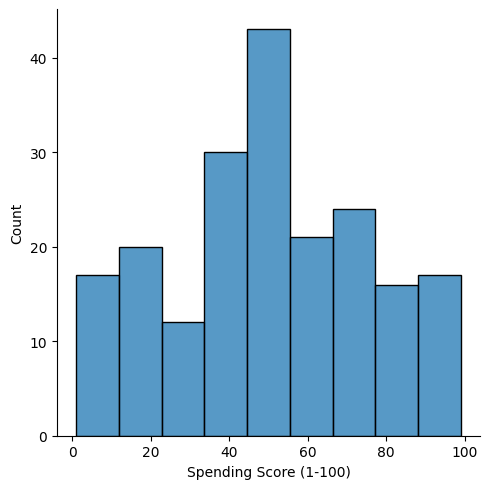

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for i in columns: 
    plt.figure()
    sns.displot(df[i])
    plt.show()  # Ensure the plot is displayed



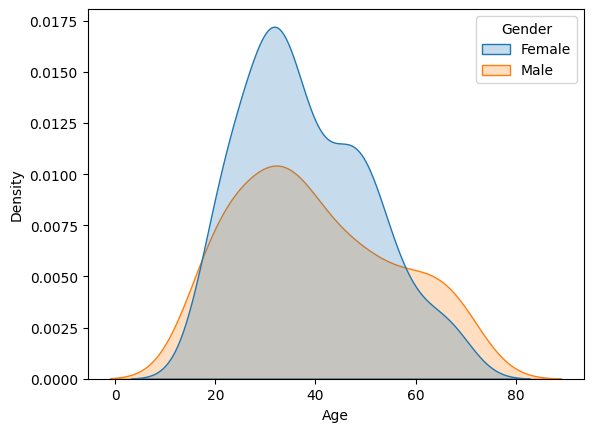

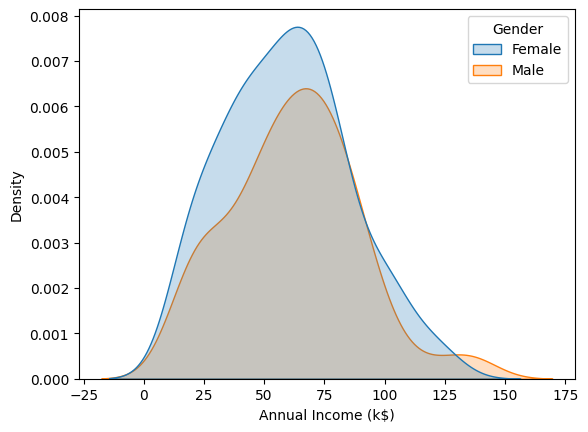

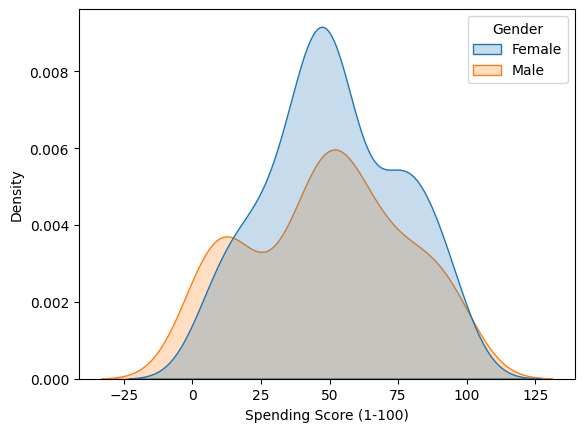

In [36]:
df['Gender'] = df['Gender'].astype('category')
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for i in columns: 
    plt.figure()
    sns.kdeplot(data=df, x=i, fill=True, hue="Gender")
    plt.show()  # Ensure the plot is displayed



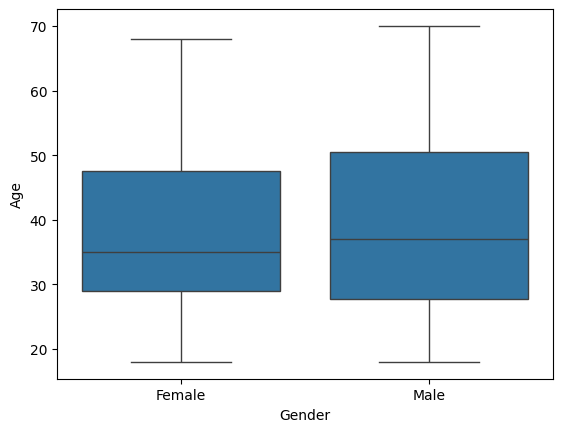

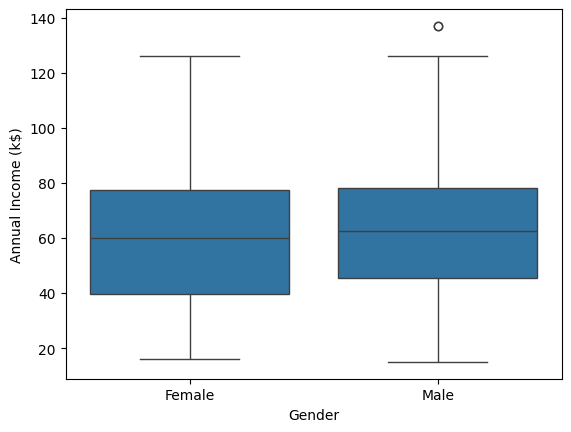

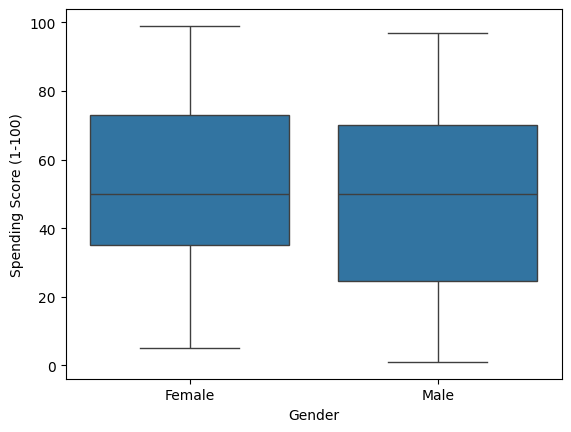

In [37]:
for i in columns: 
    plt.figure()
    sns.boxplot(data=df, x='Gender', y=df[i])
    plt.show()  # Ensure the plot is displayed

In [39]:
df["Gender"].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

# Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

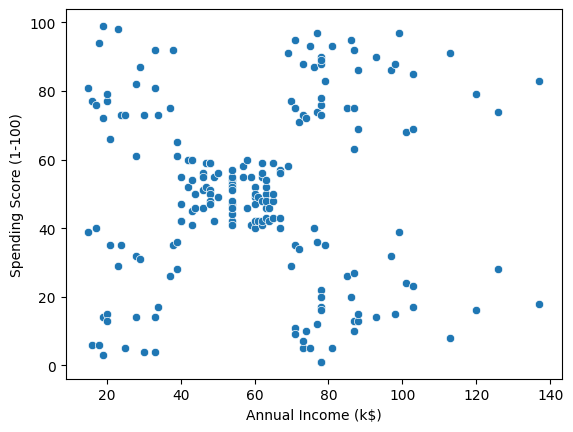

In [40]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')


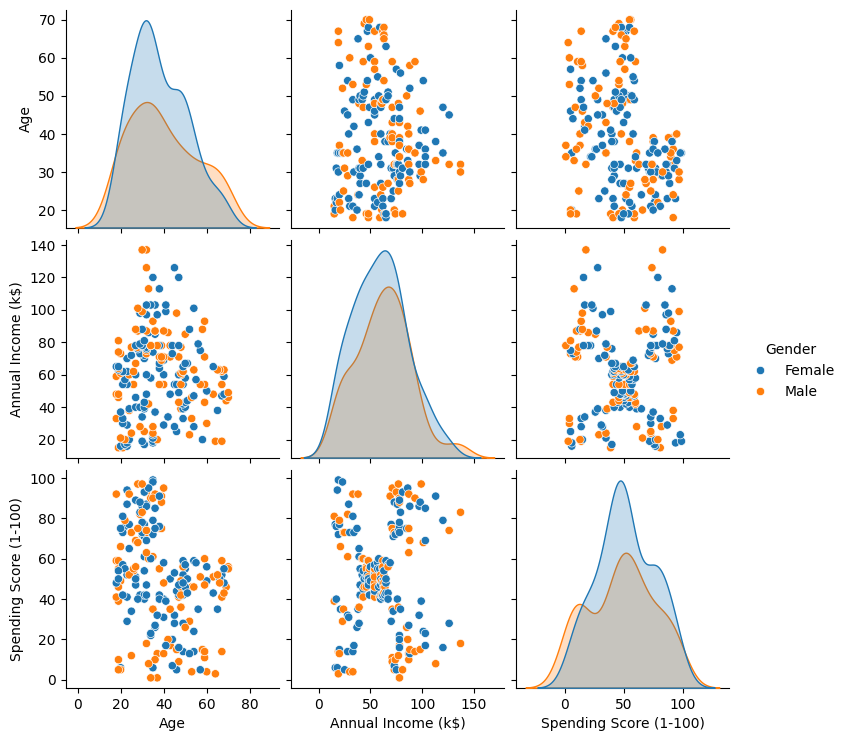

In [45]:
# df=df.drop('CustomerID', axis=1)
sns.pairplot(df, hue='Gender')

In [51]:
df.groupby(['Gender'])[['Age', 'Annual Income (k$)','Spending Score (1-100)']].mean()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23336\2907248557.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Gender'])[['Age', 'Annual Income (k$)','Spending Score (1-100)']].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [54]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df.corr()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,-0.060867,-0.056410,0.058109
Age,-0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.058109,-0.327227,0.009903,1.000000


<Axes: >

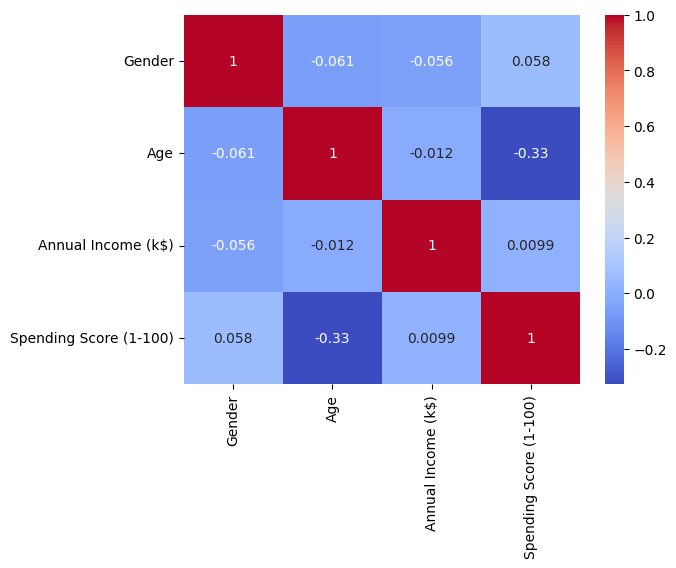

In [55]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

# Clustering, Univariate, bivariate and multivariate

In [79]:
clustring1= KMeans(n_clusters=3)

In [80]:
clustring1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [81]:
df["income cluster"]=clustring1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),income cluster
0,0,19,15,39,1
1,0,21,15,81,1
2,1,20,16,6,1
3,1,23,16,77,1
4,1,31,17,40,1


In [82]:
df["income cluster"].value_counts()

income cluster
0    92
1    72
2    36
Name: count, dtype: int64

In [83]:
clustring1.inertia_

23528.15217391306

In [84]:
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    intertia_scores.append(kmeans.inertia_)

In [85]:
intertia_scores


[137277.28000000006,
 48660.888888888876,
 25640.45778439684,
 13308.108021390362,
 9407.908188585603,
 5430.245925925925,
 4002.9013269339343,
 3133.231973908445,
 2251.60160950161,
 1736.5656510156518]

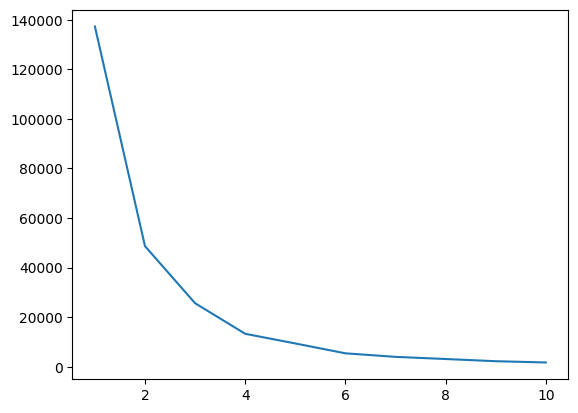

In [86]:
plt.plot(range(1,11), intertia_scores)

In [87]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'income cluster'],
      dtype='object')

In [89]:
 df.groupby( 'income cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
income cluster,,,
0,39.184783,66.717391,50.054348
1,38.930556,33.027778,50.166667
2,37.833333,99.888889,50.638889


# Bivariate Clustering


In [90]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] =clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),income cluster,Spending and Income Cluster
0,0,19,15,39,1,2
1,0,21,15,81,1,3
2,1,20,16,6,1,2
3,1,23,16,77,1,3
4,1,31,17,40,1,2


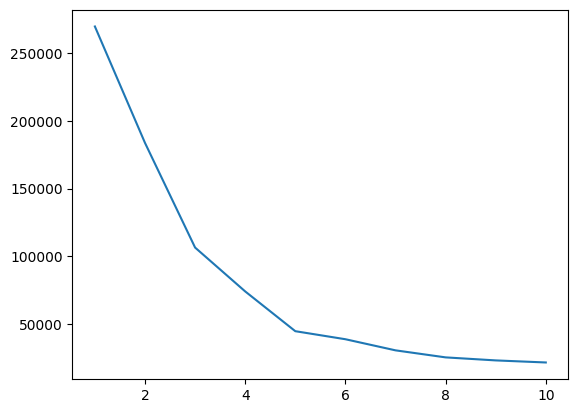

In [91]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),intertia_scores2)

In [92]:
centers =pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

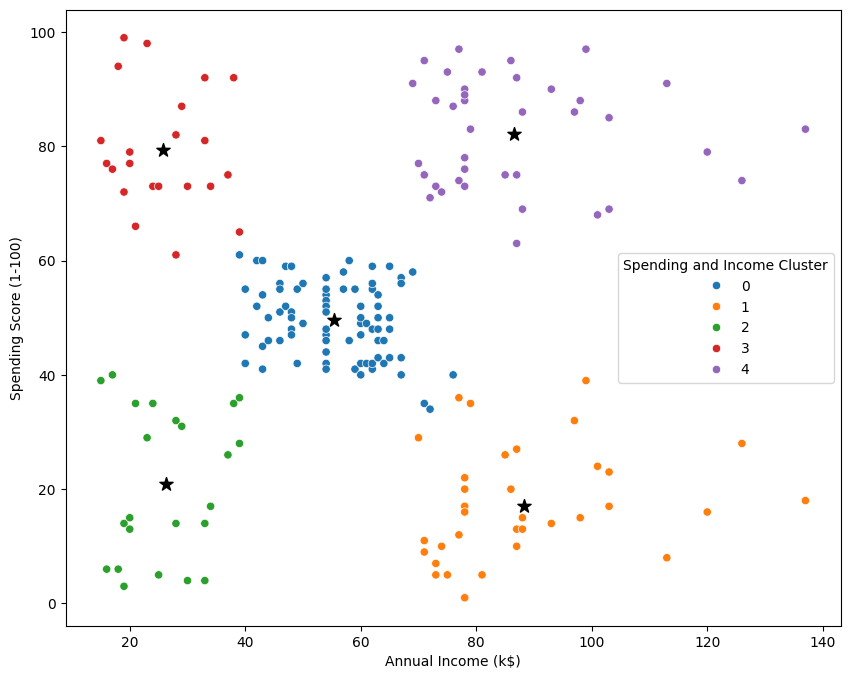

In [93]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x ='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')
plt.savefig('clustering_bivaraiate.png')

In [94]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')


Gender,1,0
Spending and Income Cluster,,
0,0.592593,0.407407
1,0.457143,0.542857
2,0.608696,0.391304
3,0.590909,0.409091
4,0.538462,0.461538


In [96]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.716049,55.296296,49.518519
1,41.114286,88.200000,17.114286
2,45.217391,26.304348,20.913043
3,25.272727,25.727273,79.363636
4,32.692308,86.538462,82.128205


# Multivariate clustering

In [97]:
from sklearn.preprocessing import StandardScaler


In [99]:
scale = StandardScaler()
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),income cluster,Spending and Income Cluster
0,0,19,15,39,1,2
1,0,21,15,81,1,3
2,1,20,16,6,1,2
3,1,23,16,77,1,3
4,1,31,17,40,1,2


In [100]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),income cluster,Spending and Income Cluster,Gender_0
0,19,15,39,1,2,True
1,21,15,81,1,3,True
2,20,16,6,1,2,False
3,23,16,77,1,3,False
4,31,17,40,1,2,False


In [101]:
dff.columns


Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'income cluster',
       'Spending and Income Cluster', 'Gender_0'],
      dtype='object')

In [103]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_0']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_0
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [105]:
dff = scale.fit_transform(dff)
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


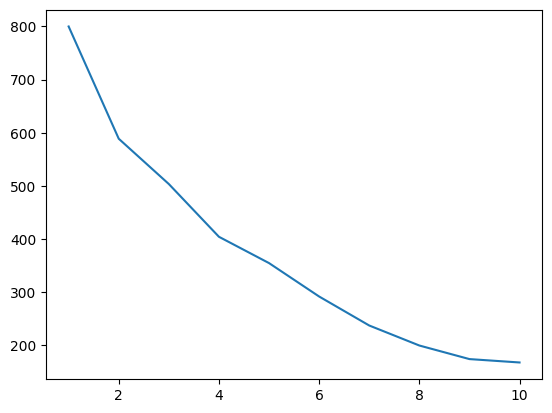

In [106]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores3)

In [108]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),income cluster,Spending and Income Cluster
0,0,19,15,39,1,2
1,0,21,15,81,1,3
2,1,20,16,6,1,2
3,1,23,16,77,1,3
4,1,31,17,40,1,2
...,...,...,...,...,...,...
195,1,35,120,79,2,4
196,1,45,126,28,2,1
197,0,32,126,74,2,4
198,0,32,137,18,2,1


In [109]:
df.to_csv('Clustering.csv')
